In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
plt.style.use('fivethirtyeight') # For plots
#%matplotlib inline 
import warnings
import seaborn as sns

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.
C:\Users\kunal\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
train=pd.read_csv(r"C:\Users\kunal\Desktop\Praxis\Time Series\TS\Train_SU63ISt.csv") 
test=pd.read_csv(r"C:\Users\kunal\Desktop\Praxis\Time Series\TS\Test_0qrQsBZ.csv")

In [3]:
train_original=train.copy() 
test_original=test.copy()

In [4]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [5]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [6]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [7]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M') 
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

Text(0.5, 1.0, 'plot count')

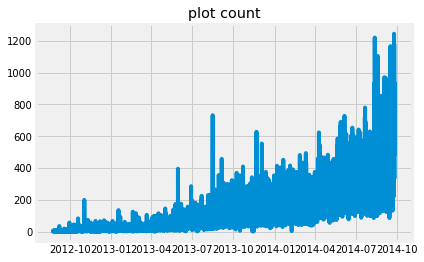

In [8]:
plt.plot(train.Datetime,train.Count)
plt.title('plot count')

In [9]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['quarter']=i.Datetime.dt.quarter
    i['month']=i.Datetime.dt.month 
    i['dayofweek']=i.Datetime.dt.dayofweek 
    i['dayofmonth']=i.Datetime.dt.day 
    i['dayofyear']=i.Datetime.dt.dayofyear
    i['weekofyear']=i.Datetime.dt.weekofyear
    i['Hour']=i.Datetime.dt.hour

In [10]:
Train=train.iloc[:,1:3]
Test=test.iloc[:,1:3]


In [11]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
temp2 = train['Datetime'].apply(applyer) 
train['weekend']=temp2

In [12]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis. 
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis. 
ts = df['Count'] 

Text(0, 0.5, 'Passenger count')

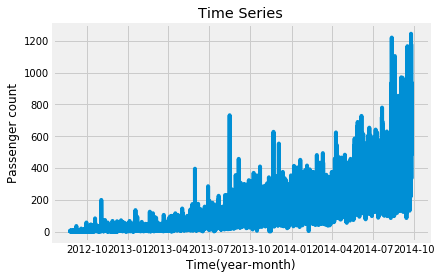

In [13]:
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
#plt.legend(loc='best')

In [14]:
Train=train.ix['2012-08-25':'2014-06-24'] 
test=train.ix['2014-06-25':'2014-09-25']

C:\Users\kunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\kunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


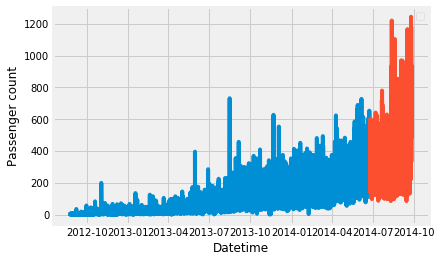

In [15]:
plt.plot(Train.index, Train.Count)
plt.plot(test.index, test.Count)
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

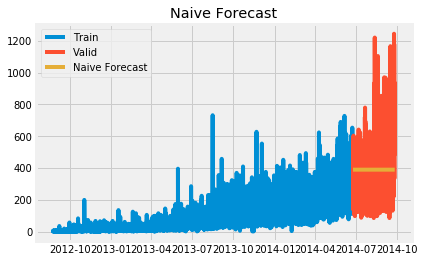

In [16]:
#i) Naive Approach
dd= np.asarray(Train.Count) 
y_hat = test.copy() 
y_hat['naive'] = dd[len(dd)-1] 
#plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(test.index,test['Count'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(test.Count, y_hat.naive)) 
print(rms)

186.37368520699056


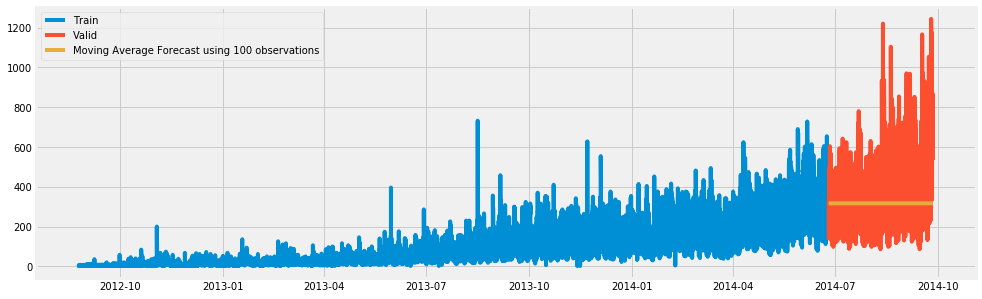

In [18]:
y_hat_avg = test.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(100).mean().iloc[-1] # average of last 100 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(test['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 100 observations') 
plt.legend(loc='best') 
plt.show() 

In [19]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

200.0119746415199


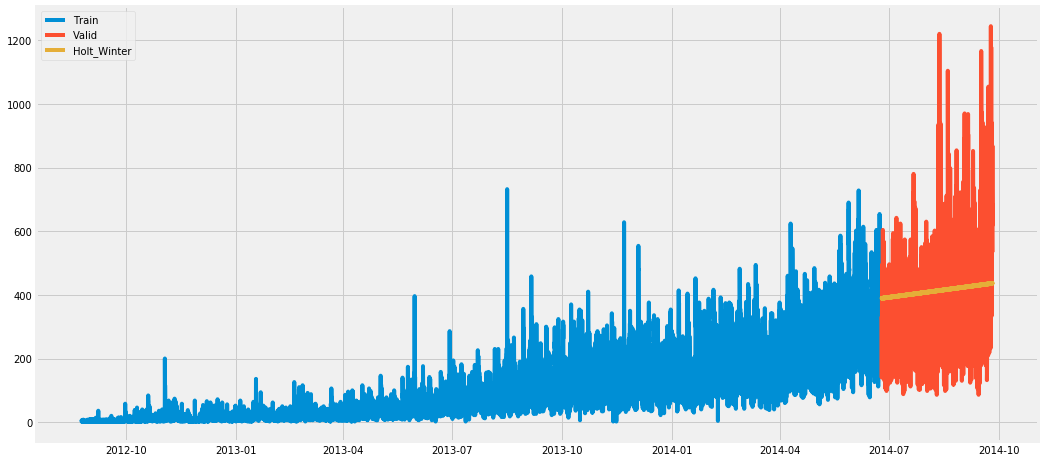

In [24]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy() 
fit1 = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit() 
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test)) 
plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(test['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()

In [26]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.Holt_Winter)) 
print(rms)

184.0293755399543


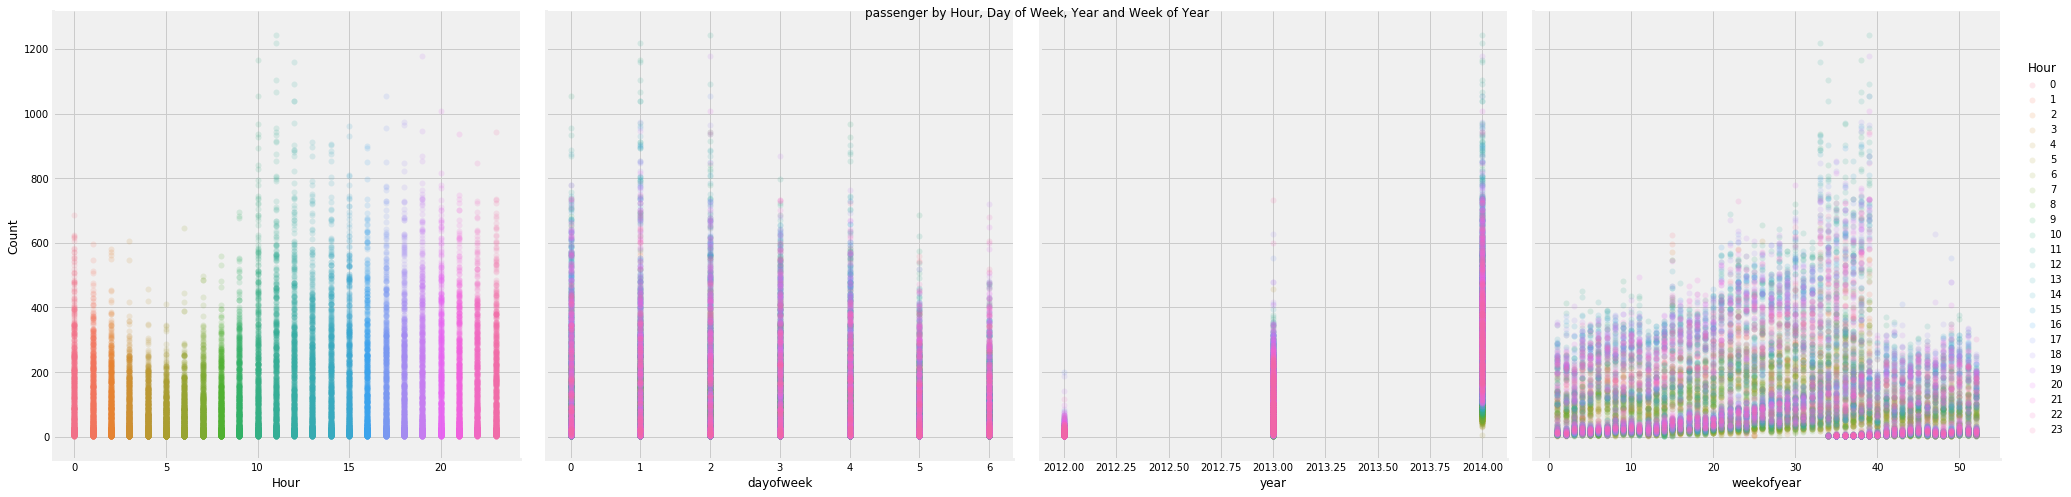

In [32]:
sns.pairplot(train.dropna(),
             hue='Hour',
             x_vars=['Hour','dayofweek',
                     'year','weekofyear'],
             y_vars='Count',
             height=7,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle('passenger by Hour, Day of Week, Year and Week of Year')
plt.show()

In [33]:
k=Train.iloc[:,1:3]
pjme_train=k.drop('Datetime',axis=1)
pjme_train=pjme_train.ix['2012-08-25':'2014-04-24']

C:\Users\kunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
m=Test.iloc[:,1:3]
pjme_test=k.drop('Datetime',axis=1)
pjme_test=pjme_test.ix['2014-04-25':'2014-06-25']

C:\Users\kunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
pjme_train.reset_index().rename(columns={'Datetime':'ds',
                     'Count':'y'}).head()

,ds,y
0,2012-08-25 00:00:00,8
1,2012-08-25 01:00:00,2
2,2012-08-25 02:00:00,6
3,2012-08-25 03:00:00,2
4,2012-08-25 04:00:00,2


In [36]:
pjme_test.head()

,Count
Datetime,
2014-04-25 00:00:00,202
2014-04-25 01:00:00,212
2014-04-25 02:00:00,178
2014-04-25 03:00:00,138
2014-04-25 04:00:00,132


In [37]:
# Setup and train model and fit

model = Prophet()
model.fit(pjme_train.reset_index().rename(columns={'Datetime':'ds','Count':'y'}))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [38]:
# Predict on training set with model
pjme_test_fcst = model.predict(df=pjme_test.reset_index().rename(columns={'Datetime':'ds'}))

In [39]:
pjme_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-25 00:00:00,230.128041,190.303994,302.172693,230.128041,230.128041,16.415123,16.415123,16.415123,5.728042,5.728042,5.728042,10.687081,10.687081,10.687081,0.0,0.0,0.0,246.543164
1,2014-04-25 01:00:00,230.153393,172.484994,289.244476,230.153393,230.153393,2.071540,2.071540,2.071540,-8.397974,-8.397974,-8.397974,10.469514,10.469514,10.469514,0.0,0.0,0.0,232.224933
2,2014-04-25 02:00:00,230.178746,158.915986,278.066310,230.178746,230.178746,-12.670214,-12.670214,-12.670214,-22.914974,-22.914974,-22.914974,10.244760,10.244760,10.244760,0.0,0.0,0.0,217.508531
3,2014-04-25 03:00:00,230.204098,150.399987,262.748408,230.204098,230.204098,-24.533855,-24.533855,-24.533855,-34.543761,-34.543761,-34.543761,10.009906,10.009906,10.009906,0.0,0.0,0.0,205.670244
4,2014-04-25 04:00:00,230.229451,141.451929,254.624184,230.229451,230.229451,-32.437072,-32.437072,-32.437072,-42.198699,-42.198699,-42.198699,9.761627,9.761627,9.761627,0.0,0.0,0.0,197.792379


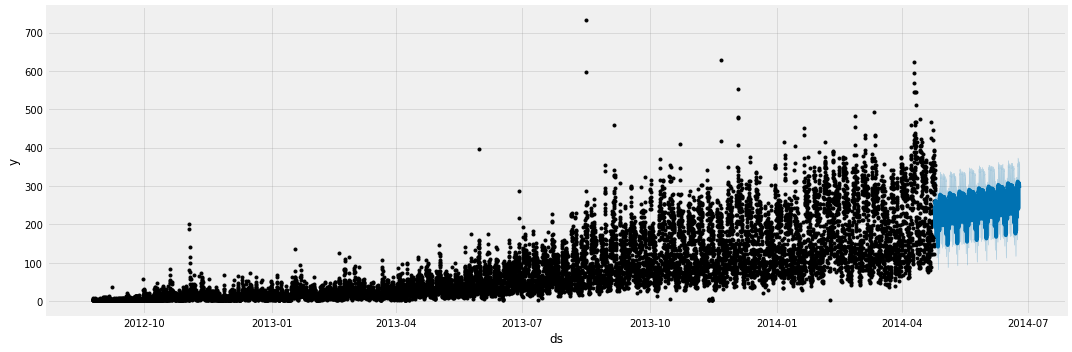

In [40]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(pjme_test_fcst,
                 ax=ax)
plt.show()

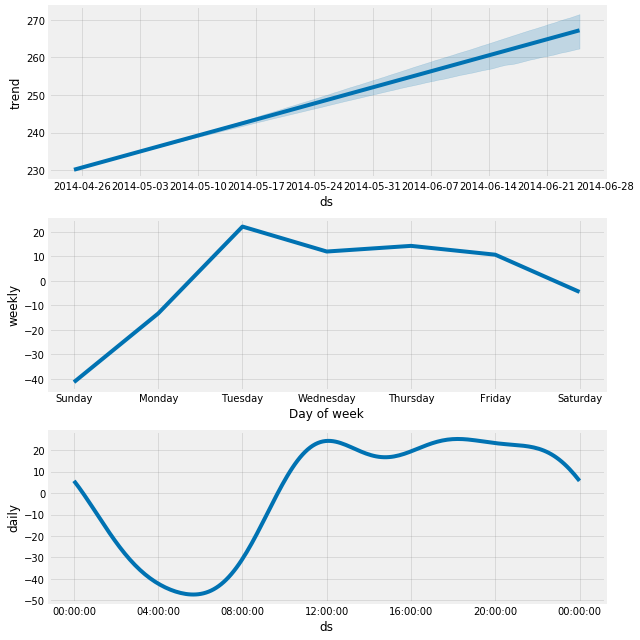

In [41]:
# Plot the components of the model
fig = model.plot_components(pjme_test_fcst)

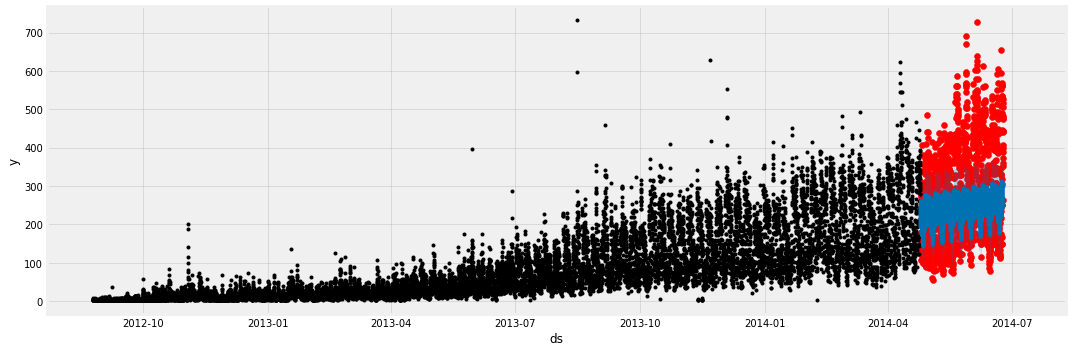

In [42]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.index, pjme_test['Count'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)

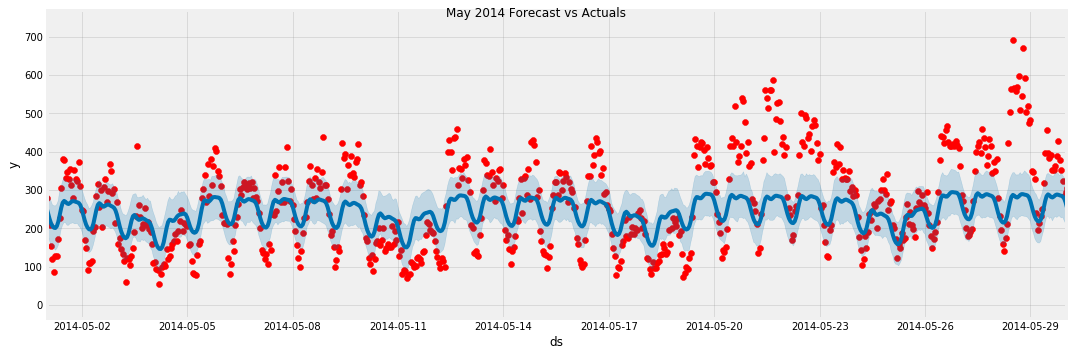

In [43]:
import datetime
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.index, pjme_test['Count'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)
ax.set_xbound(lower=[datetime.date(2014, 5, 1)],upper= [datetime.date(2014, 5, 30)])
#ax.set_ylim(0, 600)
plot = plt.suptitle('May 2014 Forecast vs Actuals')

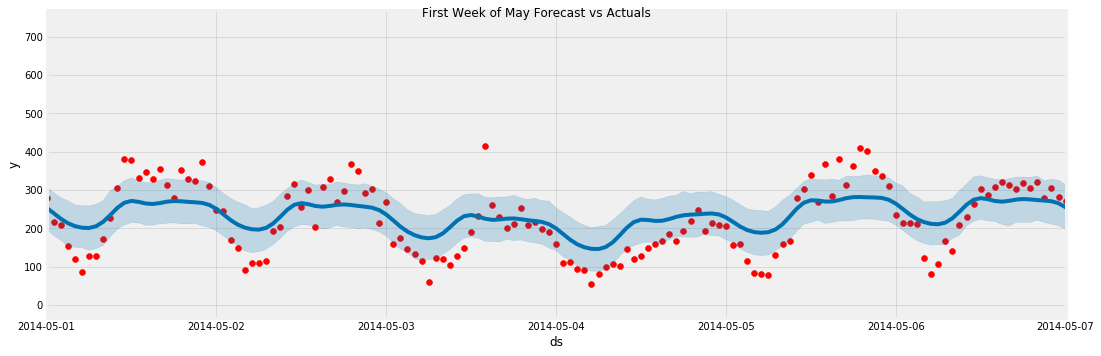

In [44]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.index, pjme_test['Count'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)
ax.set_xbound(lower=[datetime.date(2014, 5, 1)],upper= [datetime.date(2014, 5, 7)])
#ax.set_ylim(0, 60000)
plot = plt.suptitle('First Week of May Forecast vs Actuals')

In [45]:
mse=mean_squared_error(y_true=pjme_test['Count'],
                   y_pred=pjme_test_fcst['yhat'])
mse

10679.927743879882

In [46]:
rms=sqrt(mse)
rms

103.34373587150738

In [47]:
# Setup and train model and fit

model1 = Prophet( seasonality_mode='multiplicative')
model1.fit(pjme_train.reset_index().rename(columns={'Datetime':'ds','Count':'y'}))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [49]:
# Predict on training set with model
pjme_test_fcst1 = model1.predict(df=pjme_test.reset_index().rename(columns={'Datetime':'ds'}))

In [50]:
mse1=mean_squared_error(y_true=pjme_test['Count'],
                   y_pred=pjme_test_fcst1['yhat'])
mse1

6568.704944765052

In [52]:
rms1=sqrt(mse1)
rms1

81.04754743214042